In [7]:
import pandas as pd
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import os
import numpy as np
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from functions import assign_category, date_engineering, one_hot_encoding, add_activity_quantile, is_weekend

In [8]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [9]:
# Load environment variables
#try:
#    load_dotenv()
#except:
#    pass

#mongo_url = os.getenv('MONGO_URL')
#mongo_port = int(os.getenv('MONGO_PORT'))
#mongo_username = os.getenv('MONGO_USERNAME')
#mongo_password = os.getenv('MONGO_PASSWORD')
#mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
#mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

In [10]:
## connect to mongodb
#client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
#db = client['depresjon-dataset']
#collection = db['depresjon']

In [11]:
#cursor = collection.find({})
#df = pd.DataFrame(list(cursor))
#df

In [12]:
df = pd.read_pickle('..\data\depresjon\depresjon_unprocessed.pkl')
df

,timestamp,date,time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,2003-05-07,00:00:00,condition_1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,2003-05-08,00:00:00,condition_1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,2003-05-09,00:00:00,condition_1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,2003-05-10,00:00:00,condition_1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,2003-05-11,00:00:00,condition_1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,condition_9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
401,2004-06-07,2004-06-07,00:00:00,condition_9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
402,2004-06-08,2004-06-08,00:00:00,condition_9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
403,2004-06-09,2004-06-09,00:00:00,condition_9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [13]:
df.columns

Index(['timestamp', 'date', 'time', 'user_id', 'activity', 'days', 'gender',
       'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work',
       'madrs1', 'madrs2', 'madrs_mean'],
      dtype='object')

In [14]:
#df.drop('_id', axis=1, inplace=True)

In [15]:
df = is_weekend(df)
df

,timestamp,date,time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07,2003-05-07,00:00:00,condition_1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
1,2003-05-08,2003-05-08,00:00:00,condition_1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
2,2003-05-09,2003-05-09,00:00:00,condition_1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
3,2003-05-10,2003-05-10,00:00:00,condition_1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1.0
4,2003-05-11,2003-05-11,00:00:00,condition_1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,condition_9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,1.0
401,2004-06-07,2004-06-07,00:00:00,condition_9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
402,2004-06-08,2004-06-08,00:00:00,condition_9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
403,2004-06-09,2004-06-09,00:00:00,condition_9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0


In [16]:
df = df.dropna(subset=['madrs_mean'])
df

,timestamp,date,time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07,2003-05-07,00:00:00,condition_1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
1,2003-05-08,2003-05-08,00:00:00,condition_1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
2,2003-05-09,2003-05-09,00:00:00,condition_1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0.0
3,2003-05-10,2003-05-10,00:00:00,condition_1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1.0
4,2003-05-11,2003-05-11,00:00:00,condition_1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,condition_9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,1.0
401,2004-06-07,2004-06-07,00:00:00,condition_9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
402,2004-06-08,2004-06-08,00:00:00,condition_9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0
403,2004-06-09,2004-06-09,00:00:00,condition_9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0.0


In [17]:
df.columns

Index(['timestamp', 'date', 'time', 'user_id', 'activity', 'days', 'gender',
       'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work',
       'madrs1', 'madrs2', 'madrs_mean', 'is_weekend'],
      dtype='object')

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['DayName'] = pd.Series(df['date'].dt.day_name(), index=df.index)
df = df[['timestamp', 'date', 'time', 'DayName','user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'is_weekend', 'madrs_mean']]
df['user_id'] = df['user_id'].str.replace('condition_', '')
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
df

,timestamp,date,time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,2003-05-07,00:00:00,Wednesday,1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-08,2003-05-08,00:00:00,Thursday,1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-09,2003-05-09,00:00:00,Friday,1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-10,2003-05-10,00:00:00,Saturday,1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
4,2003-05-11,2003-05-11,00:00:00,Sunday,1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,Sunday,9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1.0,26.0
401,2004-06-07,2004-06-07,00:00:00,Monday,9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
402,2004-06-08,2004-06-08,00:00:00,Tuesday,9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
403,2004-06-09,2004-06-09,00:00:00,Wednesday,9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


(0.0, 2000.0)

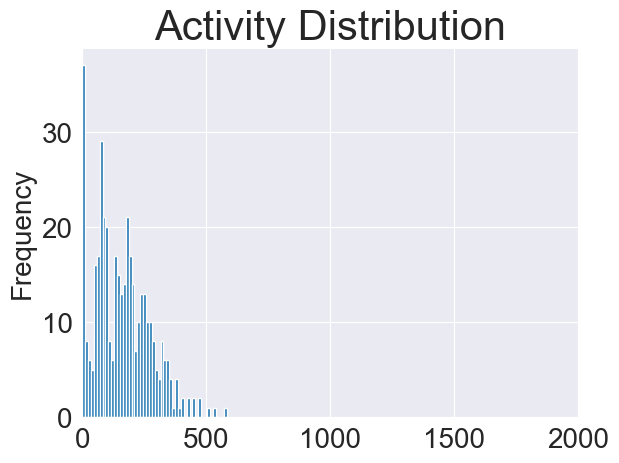

In [19]:
df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
plt.xlim(0,2000)

In [20]:
#scaler = MinMaxScaler()
#activity_data = df['activity'].values.reshape(-1, 1)
#df['activity'] = scaler.fit_transform(activity_data)
#df

In [21]:
#df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
#plt.xlim(0,1)

In [22]:
df

,timestamp,date,time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,2003-05-07,00:00:00,Wednesday,1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-08,2003-05-08,00:00:00,Thursday,1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-09,2003-05-09,00:00:00,Friday,1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-10,2003-05-10,00:00:00,Saturday,1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
4,2003-05-11,2003-05-11,00:00:00,Sunday,1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,Sunday,9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1.0,26.0
401,2004-06-07,2004-06-07,00:00:00,Monday,9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
402,2004-06-08,2004-06-08,00:00:00,Tuesday,9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
403,2004-06-09,2004-06-09,00:00:00,Wednesday,9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


In [23]:
# Get a list of unique participants
#participants = df['user_id'].unique()

#for participant in participants:
#    user_data = df[df['user_id'] == participant]
#    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
#    user_data['Date'] = user_data['timestamp'].dt.date
#    user_data['Time'] = user_data['timestamp'].dt.time

#    unique_days = user_data['Date'].unique()

#    fig, axes = plt.subplots(len(unique_days), 1, figsize=(10, 2 * len(unique_days)), sharex=True)
#    user_data['TimeDelta'] = user_data['timestamp'] - user_data['timestamp'].dt.normalize()
#    user_data['Minutes'] = user_data['TimeDelta'].dt.total_seconds() / 60

#    for ax, day in zip(axes, unique_days):
#        day_data = user_data[user_data['Date'] == day]
#        ax.bar(day_data['Minutes'], day_data['activity'], width=1, align='edge')
#        ax.set_title(f'Activity on {day} - Participant {participant}')
#        ax.set_ylabel('Activity')
#    plt.grid(True)
#    plt.xticks(ticks=range(0, 1440, 60), labels=[f"{str(i).zfill(2)}:00" for i in range(24)],#rotation=90)
#   plt.xlim(0, 1440)  # Set x-axis limit to cover one day
#    plt.xlabel('Minutes since start of day')
#    plt.tight_layout()
#    plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.png"%participant,#bbox_inches='tight')
#   plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.eps"%participant,bbox_inches='tight')
#    plt.close()

In [24]:
df

,timestamp,date,time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,2003-05-07,00:00:00,Wednesday,1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
1,2003-05-08,2003-05-08,00:00:00,Thursday,1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
2,2003-05-09,2003-05-09,00:00:00,Friday,1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0
3,2003-05-10,2003-05-10,00:00:00,Saturday,1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
4,2003-05-11,2003-05-11,00:00:00,Sunday,1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,Sunday,9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1.0,26.0
401,2004-06-07,2004-06-07,00:00:00,Monday,9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
402,2004-06-08,2004-06-08,00:00:00,Tuesday,9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0
403,2004-06-09,2004-06-09,00:00:00,Wednesday,9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0


<AxesSubplot:title={'center':'madrs_mean'}, ylabel='Frequency'>

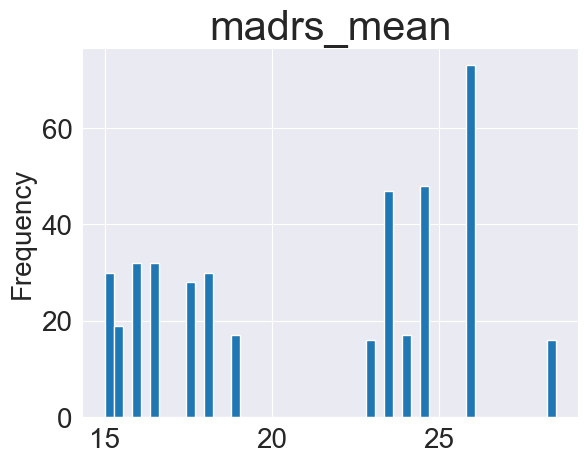

In [25]:
df['madrs_mean'].plot(kind='hist', bins=50, title='madrs_mean')

In [26]:
df["category_madrs"] = df["madrs_mean"].apply(assign_category) # in this way we transform the problem into a binary classification problem
df

,timestamp,date,time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean,category_madrs
0,2003-05-07,2003-05-07,00:00:00,Wednesday,1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
1,2003-05-08,2003-05-08,00:00:00,Thursday,1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
2,2003-05-09,2003-05-09,00:00:00,Friday,1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,19.0,mild depression
3,2003-05-10,2003-05-10,00:00:00,Saturday,1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0,mild depression
4,2003-05-11,2003-05-11,00:00:00,Sunday,1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,19.0,mild depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,Sunday,9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1.0,26.0,moderate depression
401,2004-06-07,2004-06-07,00:00:00,Monday,9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression
402,2004-06-08,2004-06-08,00:00:00,Tuesday,9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression
403,2004-06-09,2004-06-09,00:00:00,Wednesday,9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,26.0,moderate depression


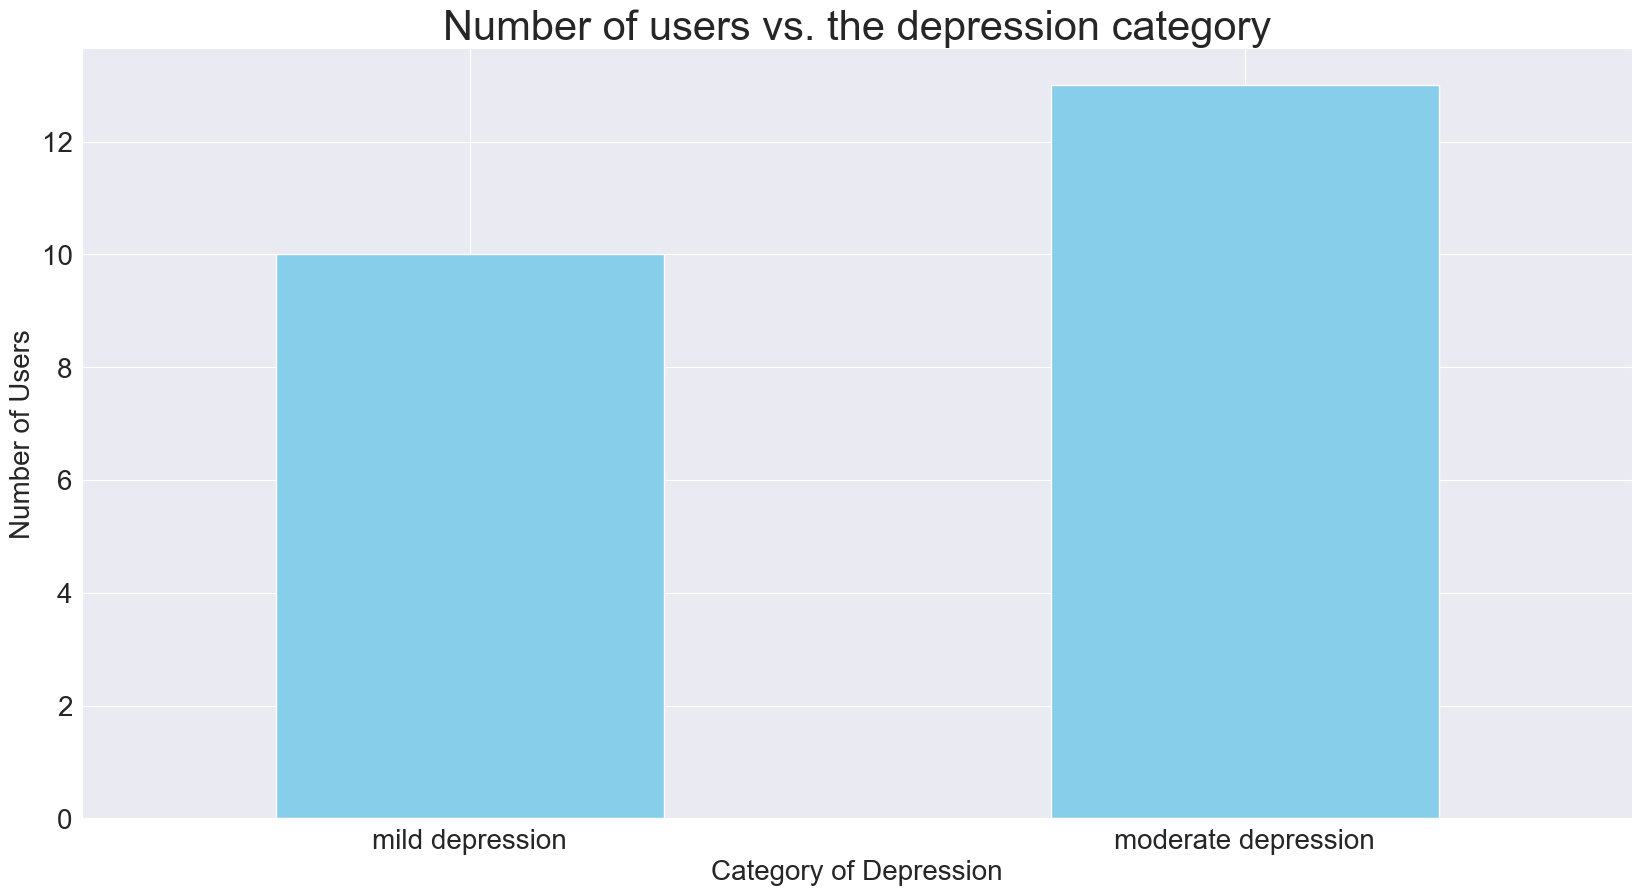

In [29]:
category_user_counts = df.groupby('category_madrs')['user_id'].nunique()
plt.figure(figsize=(20, 10))
category_user_counts.plot(kind='bar', color='skyblue')
plt.title('Number of users vs. the depression category')
plt.xlabel('Category of Depression')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.savefig("../visualizations/depresjon/binary-problem.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/binary-problem.eps",bbox_inches='tight')
plt.show()

In [30]:
# Create a new column 'is_sleeping' which is 1 if the activity is below 100 and the timestamp is between midnight and 7 AM
#user_data['is_sleeping'] = ((user_data['activity'] < 100) & ((user_data['timestamp'].dt.hour >= 0) & (user_data['timestamp'].dt.hour < 7))).astype(int)

In [31]:
df = date_engineering(df)
df

,timestamp,date,time,DayName,user_id,activity,days,gender,age,afftype,...,madrs_mean,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,2003-05-07,2003-05-07,00:00:00,Wednesday,1,174.144444,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,2003-05-08,2003-05-08,00:00:00,Thursday,1,156.247222,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,2003-05-09,2003-05-09,00:00:00,Friday,1,124.135417,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,2003-05-10,2003-05-10,00:00:00,Saturday,1,134.961806,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,2003-05-11,2003-05-11,00:00:00,Sunday,1,99.439583,11,2,35-39,2.0,...,19.0,mild depression,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,2004-06-06,00:00:00,Sunday,9,162.295833,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,2004-06-07,2004-06-07,00:00:00,Monday,9,224.508333,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,2004-06-08,2004-06-08,00:00:00,Tuesday,9,202.056250,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,2004-06-09,2004-06-09,00:00:00,Wednesday,9,168.656250,13,2,45-49,1.0,...,26.0,moderate depression,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [32]:
df.drop(columns= ['timestamp', 'date', 'time', 'DayName', 'madrs1', 'madrs2', 'madrs_mean'], axis=1, inplace=True)
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,1,174.144444,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,1,156.247222,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,1,124.135417,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,0.0,mild depression,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,1,134.961806,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,1.0,mild depression,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,1,99.439583,11,2,35-39,2.0,2.0,2.0,6-10,1.0,...,1.0,mild depression,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,162.295833,13,2,45-49,1.0,NaN,2.0,6-10,1.0,...,1.0,moderate depression,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,9,224.508333,13,2,45-49,1.0,NaN,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,9,202.056250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,9,168.656250,13,2,45-49,1.0,NaN,2.0,6-10,1.0,...,0.0,moderate depression,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [33]:
df['age'].value_counts()

45-49    94
35-39    67
40-44    60
50-54    48
30-34    42
25-29    30
60-64    16
55-59    16
65-69    16
20-24    16
Name: age, dtype: int64

In [34]:
df = one_hot_encoding(df)
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,1,174.144444,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,1,156.247222,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,1,124.135417,11,2,1,2.0,2.0,2.0,1,1.0,...,0.0,1,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,1,134.961806,11,2,1,2.0,2.0,2.0,1,1.0,...,1.0,1,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,1,99.439583,11,2,1,2.0,2.0,2.0,1,1.0,...,1.0,1,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,162.295833,13,2,2,1.0,NaN,2.0,1,1.0,...,1.0,0,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,9,224.508333,13,2,2,1.0,NaN,2.0,1,1.0,...,0.0,0,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,9,202.056250,13,2,2,1.0,NaN,2.0,1,1.0,...,0.0,0,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,9,168.656250,13,2,2,1.0,NaN,2.0,1,1.0,...,0.0,0,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [35]:
df = add_activity_quantile(df)
df

C:\Users\Christina\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["user_activity_quantile"] = pd.qcut(user_df["activity"].rank(method='first'), [0, .25, .75, 1],


,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,1,174.144444,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
1,1,156.247222,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649,1,1
2,1,124.135417,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653,1,1
3,1,134.961806,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394,1,1
4,1,99.439583,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,162.295833,13,2,2,1.0,NaN,2.0,1,1.0,...,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305,1,0
401,9,224.508333,13,2,2,1.0,NaN,2.0,1,1.0,...,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428,1,2
402,9,202.056250,13,2,2,1.0,NaN,2.0,1,1.0,...,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649,1,2
403,9,168.656250,13,2,2,1.0,NaN,2.0,1,1.0,...,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653,1,1


In [36]:
df.columns

Index(['user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch',
       'inpatient', 'edu', 'marriage', 'work', 'is_weekend', 'category_madrs',
       'month_sin', 'weekday_sin', 'week_sin', 'day_sin', 'month_cos',
       'weekday_cos', 'week_cos', 'day_cos', 'activity_quantile',
       'user_activity_quantile'],
      dtype='object')

In [37]:
df['melanch'].isna().sum()

45

In [38]:
# Calculate the global mode for the 'melanch' column
global_mode = df['melanch'].mode().iloc[0]

# Fill remaining NaN values in the 'melanch' column with the global mode
df['melanch'].fillna(global_mode, inplace=True)

In [39]:
df = df[df['edu'] != ' ']

In [40]:
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,1,174.144444,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
1,1,156.247222,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649,1,1
2,1,124.135417,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653,1,1
3,1,134.961806,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394,1,1
4,1,99.439583,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,162.295833,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305,1,0
401,9,224.508333,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428,1,2
402,9,202.056250,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649,1,2
403,9,168.656250,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653,1,1


In [41]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

C:\Users\Christina\AppData\Local\Temp\ipykernel_21624\4278944693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


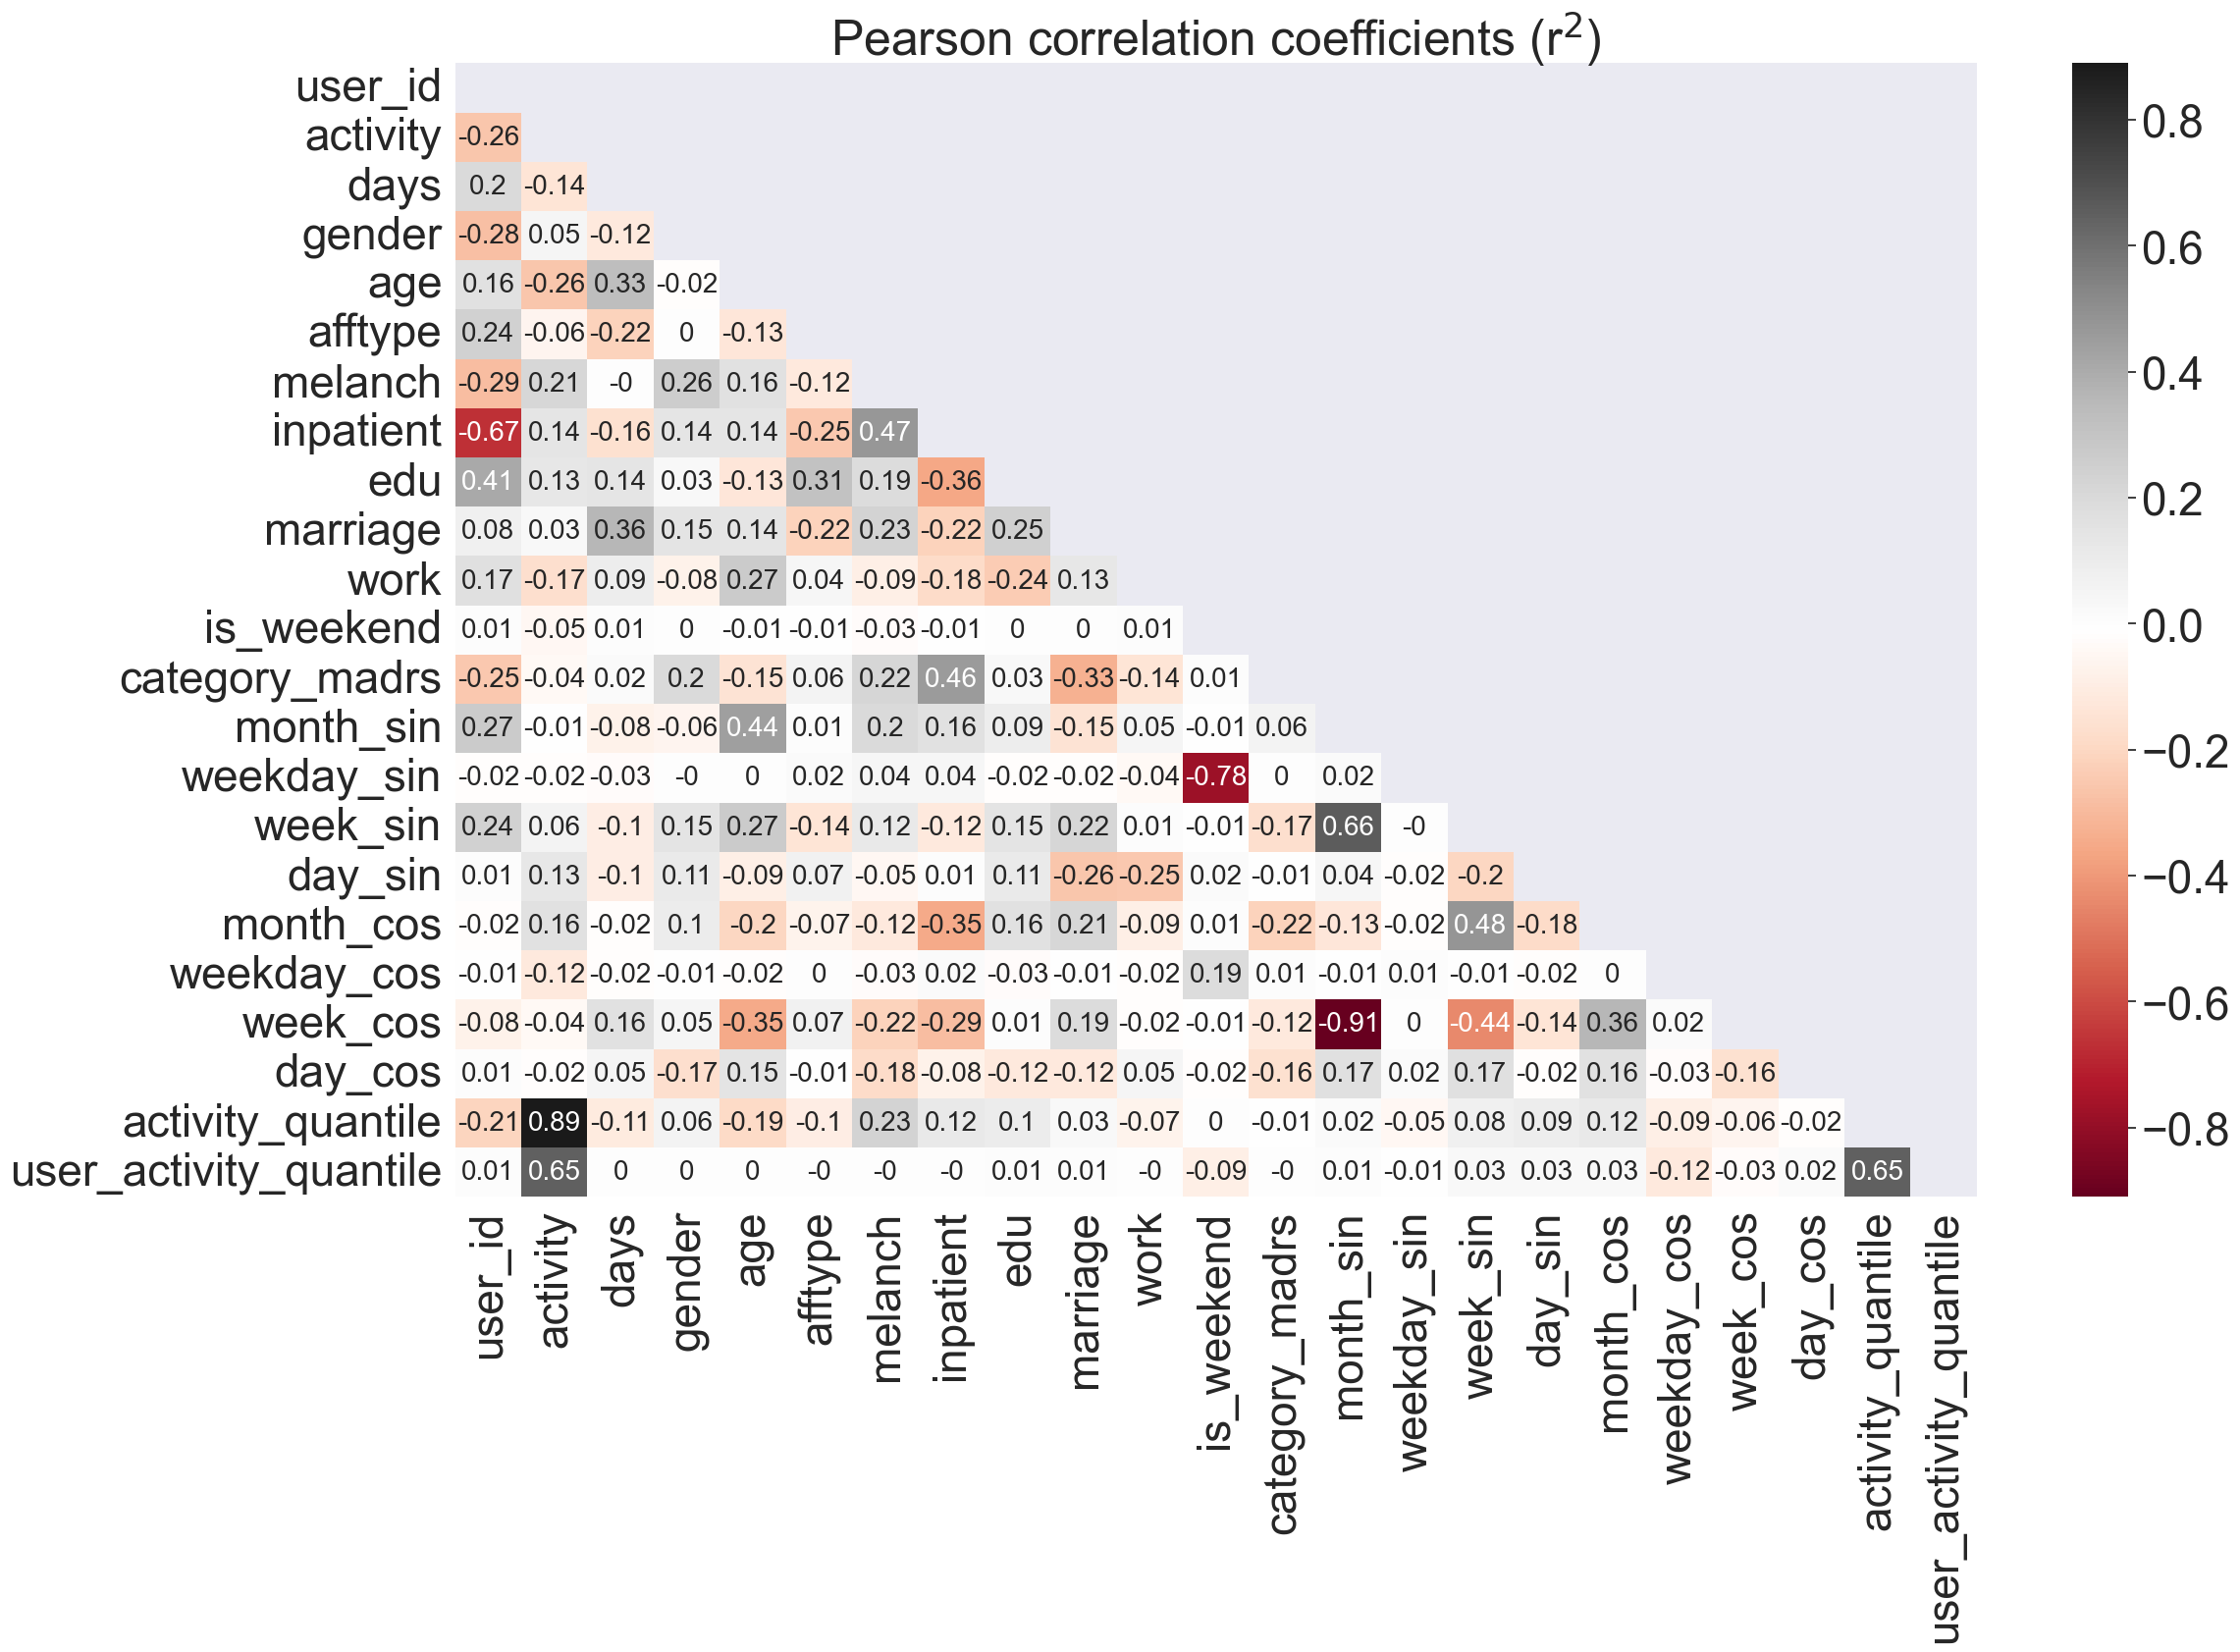

In [42]:
fig = plt.gcf()
fig.set_size_inches(25, 15)
sns.set(font_scale = 3)
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size":20}, mask=mask, cmap='RdGy', xticklabels=True, yticklabels=True)
#plt.text(32, 20, 'Pearson correlation coefficients (r$^2$)', rotation=270, fontsize=50)
plt.title('Pearson correlation coefficients (r$^2$)')
plt.savefig("../visualizations/depresjon/correlation_matrix.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/correlation_matrix.eps",bbox_inches='tight')
plt.show()

In [43]:
create_report(df).show_browser()

  0%|          | 0/2697 [00:00<?, ?it/s]

C:\Users\Christina\anaconda3\envs\un-fairness\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [44]:
df.to_pickle("../data/depresjon/depresjon_preprocessed.pkl")